In [616]:
import numpy as np
import pandas as pd
import yfinance as yf

In [617]:
# Information Technology Sector
#ticker = yf.Ticker('^GSPC')
#ticker = yf.Ticker('MSFT')
ticker = yf.Ticker('KO')
df = ticker.history(period = '1d', start='1999-01-01', end='2022-06-30')

In [618]:
df = df.reset_index()

In [619]:
# check zeros and drop the columns
if len(np.unique(df['Dividends'])):
    df=df.drop(['Dividends'],axis=1)
    
if len(np.unique(df['Stock Splits'])):
    df=df.drop(['Stock Splits'],axis=1)

In [620]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5912 entries, 0 to 5911
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5912 non-null   datetime64[ns]
 1   Open    5912 non-null   float64       
 2   High    5912 non-null   float64       
 3   Low     5912 non-null   float64       
 4   Close   5912 non-null   float64       
 5   Volume  5912 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 277.2 KB


In [621]:
daily_std = np.std(df['Close']/df['Close'].shift(1).dropna())
annual_std = daily_std*np.sqrt(252)
annual_std

0.2161381854138127

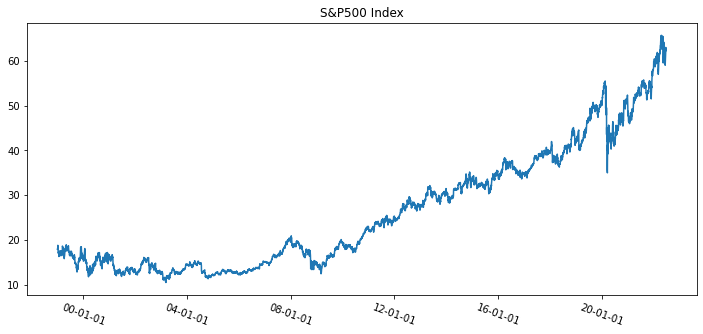

In [622]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
plt.figure(figsize=(12,5))

plt.plot(df['Date'],df['Close'])
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%y-%m-%d'))
plt.xticks(rotation=-20)
plt.title('S&P500 Index') # manually change
plt.show()

In [623]:
import talib as ta

periods=[7,14,21]

for i in periods:
    df['MA_'+str(i)+'d']=ta.SMA(df.Close,timeperiod=i)

In [624]:
df['HML'] = df['High'] - df['Low']
df['OTC'] = df['Close'] - df['Open']
df['Var'] = ta.VAR(df.Close, timeperiod=7, nbdev=1)

In [625]:
df = df[df['Date']>='2000-01-01'].reset_index(drop=True)
df

,Date,Open,High,Low,Close,Volume,MA_7d,MA_14d,MA_21d,HML,OTC,Var
0,2000-01-03,15.664130,15.664130,14.921434,15.225265,10997000,15.813635,15.929378,16.269178,0.742696,-0.438866,0.069880
1,2000-01-04,15.225263,15.343419,15.022710,15.242143,7308000,15.705125,15.836541,16.116459,0.320710,0.016879,0.099710
2,2000-01-05,15.242142,15.512213,15.140865,15.377177,9457400,15.606259,15.779874,16.017795,0.371348,0.135036,0.086360
3,2000-01-06,15.377173,15.579726,15.275896,15.394053,7129200,15.524272,15.750938,15.992073,0.303830,0.016879,0.067381
4,2000-01-07,15.630377,16.406832,15.630377,16.406832,11474000,15.594201,15.770230,16.001718,0.776455,0.776455,0.151694
...,...,...,...,...,...,...,...,...,...,...,...,...
5654,2022-06-23,61.299999,61.910000,61.230000,61.880001,17190900,60.161429,61.037766,61.836692,0.680000,0.580002,1.008014
5655,2022-06-24,62.110001,63.060001,62.110001,63.040001,18147100,60.705715,61.075029,61.811894,0.950001,0.930000,1.771569
5656,2022-06-27,62.980000,63.290001,62.630001,62.910000,12142100,61.168572,61.110099,61.778540,0.660000,-0.070000,2.098213
5657,2022-06-28,63.080002,63.759998,62.110001,62.279999,13150100,61.627143,61.073220,61.704313,1.649998,-0.800003,1.435249


In [626]:
df_adj = df[df.columns[1:]]

In [627]:
df_adj

,Open,High,Low,Close,Volume,MA_7d,MA_14d,MA_21d,HML,OTC,Var
0,15.664130,15.664130,14.921434,15.225265,10997000,15.813635,15.929378,16.269178,0.742696,-0.438866,0.069880
1,15.225263,15.343419,15.022710,15.242143,7308000,15.705125,15.836541,16.116459,0.320710,0.016879,0.099710
2,15.242142,15.512213,15.140865,15.377177,9457400,15.606259,15.779874,16.017795,0.371348,0.135036,0.086360
3,15.377173,15.579726,15.275896,15.394053,7129200,15.524272,15.750938,15.992073,0.303830,0.016879,0.067381
4,15.630377,16.406832,15.630377,16.406832,11474000,15.594201,15.770230,16.001718,0.776455,0.776455,0.151694
...,...,...,...,...,...,...,...,...,...,...,...
5654,61.299999,61.910000,61.230000,61.880001,17190900,60.161429,61.037766,61.836692,0.680000,0.580002,1.008014
5655,62.110001,63.060001,62.110001,63.040001,18147100,60.705715,61.075029,61.811894,0.950001,0.930000,1.771569
5656,62.980000,63.290001,62.630001,62.910000,12142100,61.168572,61.110099,61.778540,0.660000,-0.070000,2.098213
5657,63.080002,63.759998,62.110001,62.279999,13150100,61.627143,61.073220,61.704313,1.649998,-0.800003,1.435249


In [628]:
# split dataset

def split_data(df):
    split_num = int(len(df)*0.8)
    train = df[0:split_num]
    test = df[split_num:]
    
    return train,test

In [629]:
train,test = split_data(df_adj)

In [630]:
train_norm

array([[0.1722769 , 0.16761571, 0.15066811, ..., 0.37426392, 0.36053607,
        0.03650598],
       [0.15771621, 0.1569739 , 0.15407801, ..., 0.14581518, 0.5335692 ,
        0.05215835],
       [0.15827605, 0.16257474, 0.15805585, ..., 0.17322896, 0.57842964,
        0.04515266],
       ...,
       [0.96453937, 0.96457219, 0.97699779, ..., 0.08930144, 0.5632979 ,
        0.02028719],
       [0.97028082, 0.96686885, 0.98020205, ..., 0.07524732, 0.53701574,
        0.01520047],
       [0.97056803, 0.96830471, 0.97787163, ..., 0.13614547, 0.46474234,
        0.01584034]])

In [631]:
# normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

def norm_data(train,test):
    train_norm = scaler.fit_transform(train)
    test_norm = scaler.fit_transform(test)
    
    return train_norm,test_norm

In [632]:
train_norm,test_norm = norm_data(train,test)

In [633]:
# construct and finalize dataset

# divide data into 30/50 rows per input
timesteps = 30

def finalize(norm_df):

    X, y = [], []

    for i in range(timesteps, len(norm_df)):
        X.append(norm_df[i - timesteps:i])
        y.append(norm_df[i,3])

    X, y = np.array(X), np.array(y)
    
    return X,y

In [634]:
X_train, y_train = finalize(train_norm)
X_test, y_test = finalize(test_norm)

In [635]:
from pandas._libs.tslibs import timestamps
# data prediction
from keras import Input
from keras.models import Sequential, Model
from keras.layers import SimpleRNN, LSTM, Dense, Dropout, Activation, Reshape,Bidirectional   

epochs = 50

# iteration number of batches 
# trial: 32/64/128
batch_size = 25

output_dim = 1
units = 30

In [636]:
# LSTM model

def lstm_model(X_train,y_train,X_test):
    
    n_features = X_train.shape[-1]
    
    #model = Sequential()
    #model.add(Bidirectional(LSTM(64, activation='relu', dropout=0.2), input_shape=(timesteps, n_features)))
    #model.add(Dense(1))
    #model.compile(optimizer='adam', loss='mean_squared_error')
    
    
    input_layer = Input(shape=(timesteps, n_features))
    lstm_output = LSTM(64, activation='relu')(input_layer)
    output_layer = Dense(output_dim)(lstm_output)
    model = Model(inputs=input_layer,outputs=output_layer)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size)
    
    X_test_adj = X_test.reshape((-1,timesteps,n_features,1))
    y_pred = model.predict(X_test_adj)
    
    return y_pred

In [637]:
len(X_train)

4497

In [638]:
from keras.layers import Conv1D, Conv2D, Flatten, concatenate, MaxPooling1D, MaxPooling2D, Bidirectional, MaxPooling2D, TimeDistributed
# Combined Model: CNN + LSTM

def combined_model(X_train,y_train,X_test):
    
    input_dim = X_train.shape[-1]
    X_train_adj = X_train.reshape((-1,timesteps,input_dim,1))
    
    combined_model = Sequential()
    '''cnn'''
    combined_model.add(TimeDistributed(Conv1D(filters = 20, kernel_size = (2,), activation = 'relu'),input_shape=(timesteps,input_dim, 1)))
    combined_model.add(TimeDistributed(Flatten()))
    combined_model.add(Dense(32, activation='relu'))

    '''lstm'''
    combined_model.add(LSTM(units, activation='relu',dropout=0.1))
    combined_model.add(Dense(output_dim))
    combined_model.compile(optimizer='adam', loss='mean_squared_error')
    
    combined_model.fit(X_train_adj, y_train, epochs=epochs, batch_size=batch_size)
    
    X_test_adj = X_test.reshape((-1,timesteps,input_dim,1))
    y_pred = combined_model.predict(X_test_adj)
    
    return y_pred

In [639]:
pred_lstm = lstm_model(X_train,y_train,X_test)

Epoch 1/50
180/180 [==============================] - 11s 35ms/step - loss: 9.2240e-04
Epoch 2/50
180/180 [==============================] - 5s 26ms/step - loss: 1.5359e-04
Epoch 3/50
180/180 [==============================] - 4s 21ms/step - loss: 1.2639e-04
Epoch 4/50
180/180 [==============================] - 7s 40ms/step - loss: 1.0814e-04
Epoch 5/50
180/180 [==============================] - 7s 39ms/step - loss: 1.1391e-04
Epoch 6/50
180/180 [==============================] - 6s 33ms/step - loss: 1.0765e-04
Epoch 7/50
180/180 [==============================] - 4s 24ms/step - loss: 1.0105e-04
Epoch 8/50
180/180 [==============================] - 4s 22ms/step - loss: 1.0065e-04
Epoch 9/50
180/180 [==============================] - 9s 51ms/step - loss: 9.4917e-05
Epoch 10/50
180/180 [==============================] - 7s 39ms/step - loss: 9.7324e-05
Epoch 11/50
180/180 [==============================] - 5s 27ms/step - loss: 8.6163e-05
Epoch 12/50
180/180 [==============================

In [640]:
'''
lstm_history = pd.DataFrame(lstm_model.history)
lstm_history['epoch'] = lstm_model.epoch

fig,ax = plt.subplots(1,figsize(8,6))
num_epochs = model_history.shape[0]

ax.plot(np.arrange(0,num_epochs),lstm_history['mae'],label='Training MAE')
ax.plot(np.arrange(0,num_epochs),lstm_history['val_mae'],label='Validation MAE')
ax.legend()

plt.tight_layout()
plt.show()
'''

"\nlstm_history = pd.DataFrame(lstm_model.history)\nlstm_history['epoch'] = lstm_model.epoch\n\nfig,ax = plt.subplots(1,figsize(8,6))\nnum_epochs = model_history.shape[0]\n\nax.plot(np.arrange(0,num_epochs),lstm_history['mae'],label='Training MAE')\nax.plot(np.arrange(0,num_epochs),lstm_history['val_mae'],label='Validation MAE')\nax.legend()\n\nplt.tight_layout()\nplt.show()\n"

In [641]:
scaler.fit_transform(pd.DataFrame(test['Close'].values))

pred_lstm = scaler.inverse_transform(pred_lstm)
# denormalization
y_test = scaler.inverse_transform([y_test])

In [642]:
# pred_combined = combined_model(X_train,y_train,X_test)

In [643]:
# scaler.fit_transform(pd.DataFrame(test['Close'].values))

# pred_combined = scaler.inverse_transform(pred_combined)
# y_test = scaler.inverse_transform([y_test])

In [644]:
df_lstm = pd.DataFrame()
df_lstm['Date'] = df['Date'][int(len(df_adj)*0.8)+timesteps:].reset_index(drop=True)
df_lstm['Test'] = y_test[0]
df_lstm['Prediction'] = pred_lstm.reshape(1,-1)[0]

In [645]:
df_lstm

,Date,Test,Prediction
0,2018-02-13,38.236462,37.632927
1,2018-02-14,38.158588,37.884190
2,2018-02-15,38.746975,37.839230
3,2018-02-16,38.920033,38.229389
4,2018-02-20,38.063416,38.518906
...,...,...,...
1097,2022-06-23,61.880001,60.548256
1098,2022-06-24,63.040001,61.170635
1099,2022-06-27,62.910000,62.118401
1100,2022-06-28,62.279999,62.293507


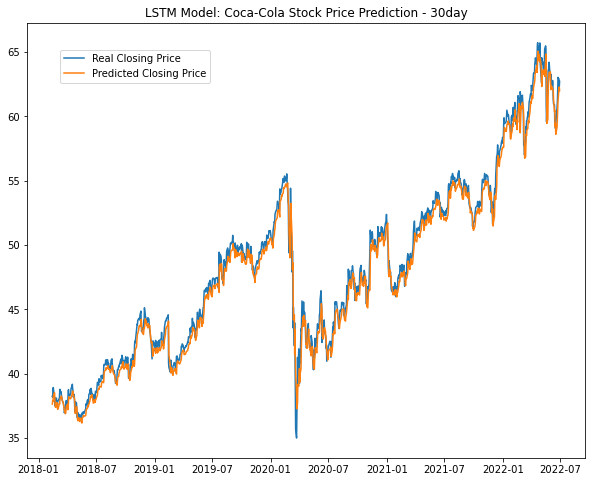

In [646]:
# two models visualization and comparison

# LSTM model
plt.figure(figsize=(10,8))
x = df_lstm['Date']
plt.plot(x, df_lstm['Test'], label="Real Closing Price")
plt.plot(x, df_lstm['Prediction'], label="Predicted Closing Price")
plt.legend(loc='upper left', bbox_to_anchor=(0.05, 0.95))
plt.title('LSTM Model: Coca-Cola Stock Price Prediction - 30day')

plt.show()

## Evaluation

In [647]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [648]:
# find each year end index
year_idx = []
year_idx.append(0)
for i in range(len(df_lstm)-1):
    if df_lstm['Date'][i].year != df_lstm['Date'][i+1].year:
        year_idx.append(i+1)
year_idx.append(-1)

In [649]:
year_idx

[0, 222, 474, 727, 979, -1]

In [650]:
def evaluation_tbl(df,year_idx):
    summary = pd.DataFrame()
    summary['Date'] = np.unique(pd.DatetimeIndex(df['Date']).year) 
    summary = summary.set_index('Date')
    
    rmse = []
    mae = []
    mape = []
    
    for i in range(len(year_idx)-1):
        
        test = df['Test'][year_idx[i]:year_idx[i+1]]
        pred = df['Prediction'][year_idx[i]:year_idx[i+1]]
        
        # mean squared error
        rmse.append(round(np.sqrt(mean_squared_error(test, pred)),3))
        mae.append(round(mean_absolute_error(test, pred),3))
        mape.append('{:.2%}'.format(mean_absolute_percentage_error(test, pred)))
    
    summary['RMSE']=rmse
    summary['MAE']=mae
    summary['MAPE']=mape
    return summary

In [651]:
# LSTM evaluation
lstm_summary = evaluation_tbl(df_lstm,year_idx)
lstm_summary

,RMSE,MAE,MAPE
Date,,,
2018,0.559,0.465,1.15%
2019,0.693,0.560,1.21%
2020,1.112,0.836,1.82%
2021,0.704,0.590,1.12%
2022,1.065,0.869,1.41%


In [652]:
count = 0
for i in range(len(df_lstm)-1):
    pred_diff = df_lstm['Prediction'][i+1] - df_lstm['Prediction'][i]
    test_diff = df_lstm['Test'][i+1] - df_lstm['Test'][i]
    if pred_diff <= 0 and test_diff <= 0:
        count += 1
    if pred_diff > 0 and test_diff > 0:
        count += 1

In [653]:
count/len(df_lstm)

0.4945553539019964

In [654]:
# from dataframe_to_image import dataframe_to_image
# dataframe_to_image.convert(summary,visualisation_library='matplotlib')

In [655]:
# pred_combined.to_excel("sp_pred.xlsx", sheet_name='Sheet1')